In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

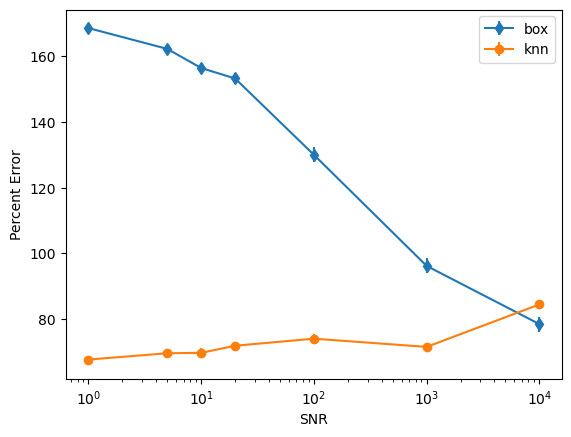

In [61]:
model='patchy_data'
state='homeotropic'
ndata=100
runs=np.arange(1, 11, 1)
npatches=10
patchr=15
lx=500
ly=500
SNRs = np.array([1, 5, 10, 20, 100, 1000, 10000])

data_dir = '../data/'+model+'/SNR_{:.5f}_ndata_{:d}_state_{:s}/npatches_{:d}_patchr_{:d}/lx_{:d}_ly_{:d}/run_{:d}/data'.format(SNRs[0], ndata, state, npatches, patchr, lx, ly, runs[0])

error_density_kNN = np.zeros((len(SNRs), len(runs)))
error_density_box = np.zeros((len(SNRs), len(runs)))

bs = 20
ss = 10
cdx = 5
cdy = 5
k = 5

for s in np.arange(len(SNRs)):
    for r in runs-1:
        analysis_dir = '../data/'+model+'/SNR_{:d}_ndata_{:d}_state_{:s}/npatches_{:d}_patchr_{:d}/lx_{:d}_ly_{:d}/run_{:d}/analysis'.format(SNRs[s], ndata, state, npatches, patchr, lx, ly, runs[r])
        error_density_box[s, r] += np.sum(np.load(analysis_dir+'/box_density_error_bs_{:d}_ss_{:d}.npy'.format(bs, ss)))
        error_density_kNN[s, r] += np.sum(np.load(analysis_dir+'/kNN_density_error_k_{:d}_cdx_{:d}_cdy_{:d}.npy'.format(k, cdx, cdy)))

plt.errorbar(SNRs, 100*np.mean(error_density_box, axis=1), yerr=100*np.std(error_density_box, axis=1)/np.sqrt(len(runs)-1), label='box', marker='d')
plt.errorbar(SNRs, 100*np.mean(error_density_kNN, axis=1), yerr=100*np.std(error_density_kNN, axis=1)/np.sqrt(len(runs)-1), label='knn', marker='o')
#plt.plot(100*SNRs, 1e6*SNRs, linestyle='dashed', color='k')
plt.legend()
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('SNR')
plt.ylabel('Percent Error')
plt.show()

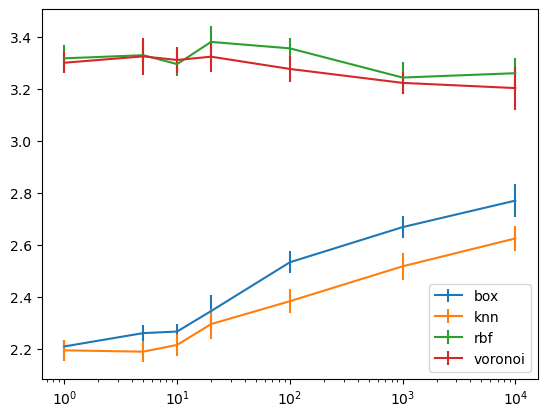

In [60]:
error_angle_kNN = np.zeros((len(SNRs), len(runs)))
error_angle_box = np.zeros((len(SNRs), len(runs)))
error_angle_voronoi = np.zeros((len(SNRs), len(runs)))
error_angle_rbf = np.zeros((len(SNRs), len(runs)))

for s in np.arange(len(SNRs)):
    for r in runs-1:
        analysis_dir = '../data/'+model+'/SNR_{:d}_ndata_{:d}_state_{:s}/npatches_{:d}_patchr_{:d}/lx_{:d}_ly_{:d}/run_{:d}/analysis'.format(SNRs[s], ndata, state, npatches, patchr, lx, ly, runs[r])
        error_angle_box[s, r] += np.sum(np.load(analysis_dir+'/box_angle_error_bs_{:d}_ss_{:d}.npy'.format(bs, ss))*np.load(analysis_dir+'/box_density_bs_{:d}_ss_{:d}.npy'.format(bs, ss))*ss*ss)
        error_angle_kNN[s, r] += np.sum(np.load(analysis_dir+'/kNN_angle_error_k_{:d}_cdx_{:d}_cdy_{:d}.npy'.format(k, cdx, cdy))*np.load(analysis_dir+'/kNN_density_k_{:d}_cdx_{:d}_cdy_{:d}.npy'.format(k, cdx, cdy))*cdx*cdy)
        error_angle_voronoi[s,r] += np.sum(np.load(analysis_dir+'/voronoi_angle_error_cdx_{:d}_cdy_{:d}.npy'.format(cdx, cdy))*np.load(analysis_dir+'/kNN_density_k_{:d}_cdx_{:d}_cdy_{:d}.npy'.format(k, cdx, cdy))*cdx*cdy)
        error_angle_rbf[s, r] += np.sum(np.load(analysis_dir+'/rbf_angle_error_cdx_{:d}_cdy_{:d}.npy'.format(cdx, cdy))*np.load(analysis_dir+'/kNN_density_k_{:d}_cdx_{:d}_cdy_{:d}.npy'.format(k, cdx, cdy))*cdx*cdy)

plt.errorbar(SNRs, np.mean(error_angle_box, axis=1), yerr=np.std(error_angle_box, axis=1)/np.sqrt(len(runs)-1), label='box')
plt.errorbar(SNRs, np.mean(error_angle_kNN, axis=1), yerr=np.std(error_angle_kNN, axis=1)/np.sqrt(len(runs)-1), label='knn')
plt.errorbar(SNRs, np.mean(error_angle_rbf, axis=1), yerr=np.std(error_angle_rbf, axis=1)/np.sqrt(len(runs)-1), label='rbf')
plt.errorbar(SNRs, np.mean(error_angle_voronoi, axis=1), yerr=np.std(error_angle_voronoi, axis=1)/np.sqrt(len(runs)-1), label='voronoi')

plt.xscale('log')
plt.legend()
plt.show()